In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train.csv")
df2 = pd.read_csv("Test.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [48]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [49]:
df2.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [10]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:>

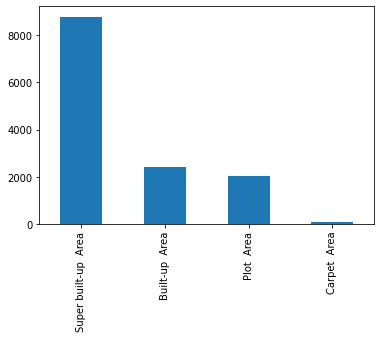

In [5]:
df['area_type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

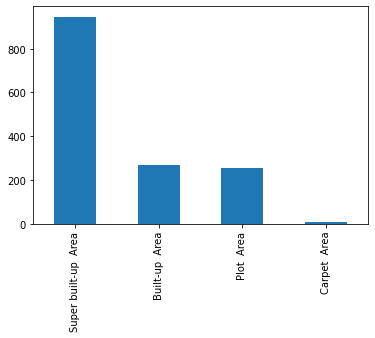

In [6]:
df2['area_type'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='size'>

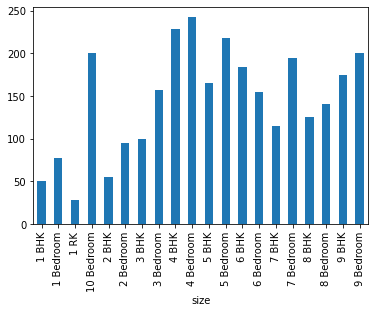

In [7]:
df[df['area_type'] == 'Built-up  Area'].groupby('size')['price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='size'>

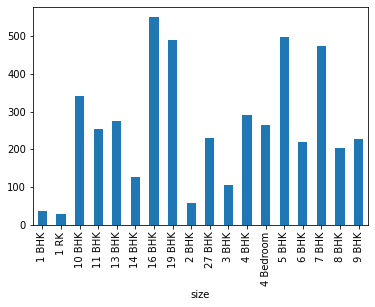

In [8]:
df[df['area_type'] == 'Super built-up  Area'].groupby('size')['price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='size'>

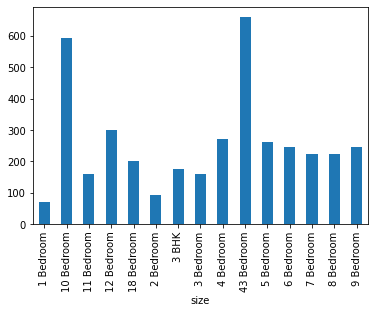

In [9]:
df[df['area_type'] == 'Plot  Area'].groupby('size')['price'].mean().plot(kind = 'bar')

In [51]:
df['society'] = df.groupby('area_type')['society'].transform(lambda x: x.fillna(x.mode()[0]) )

df2['society'] = df2.groupby('area_type')['society'].transform(lambda x: x.fillna(x.mode()[0]) )

In [52]:
df['location'] = df.groupby('area_type')['location'].transform(lambda x: x.fillna(x.mode()[0]))

In [53]:
df['size'] = df.groupby('area_type')['size'].transform(lambda x: x.fillna(x.mode()[0]))

df2['size'] = df.groupby('area_type')['size'].transform(lambda x: x.fillna(x.mode()[0]))

In [54]:
df['size']= df['size'].replace(['3 Bedroom','3 BHK'],3)
df['size']= df['size'].replace(['4 Bedroom','4 BHK'],4)
df['size']= df['size'].replace(['5 Bedroom','5 BHK'],5)
df['size']= df['size'].replace(['6 Bedroom','6 BHK'],6)
df['size']= df['size'].replace(['7 Bedroom','7 BHK'],7)
df['size']= df['size'].replace(['8 Bedroom','8 BHK'],8)
df['size']= df['size'].replace(['9 Bedroom','9 BHK'],9)
df['size']= df['size'].replace(['10 Bedroom','10 BHK'],10)
df['size']= df['size'].replace(['11 Bedroom','11 BHK'],11)
df['size']= df['size'].replace(['12 Bedroom','12 BHK'],12)
df['size']= df['size'].replace(['2 Bedroom','2 BHK'],2)
df['size']= df['size'].replace(['1 Bedroom','1 BHK',],1)


In [55]:
df['size']= df['size'].replace(['1 RK','13 BHK','14 BHK','16 BHK','19 BHK','18 Bedroom','27 BHK','43 Bedroom'],[1,13,14,16,19,18,27,43])

In [56]:
df2['size'].value_counts()

2 BHK        580
3 BHK        489
4 Bedroom     88
1 BHK         63
4 BHK         56
3 Bedroom     56
2 Bedroom     33
5 Bedroom     29
6 Bedroom     25
1 Bedroom     12
8 Bedroom     12
7 Bedroom      8
9 Bedroom      8
5 BHK          7
6 BHK          4
7 BHK          4
1 RK           3
9 BHK          2
11 BHK         1
Name: size, dtype: int64

In [62]:
df2['size']= df2['size'].replace(['3 Bedroom','3 BHK'],3)
df2['size']= df2['size'].replace(['4 Bedroom','4 BHK'],4)
df2['size']= df2['size'].replace(['5 Bedroom','5 BHK'],5)
df2['size']= df2['size'].replace(['6 Bedroom','6 BHK'],6)
df2['size']= df2['size'].replace(['7 Bedroom','7 BHK'],7)
df2['size']= df2['size'].replace(['8 Bedroom','8 BHK'],8)
df2['size']= df2['size'].replace(['9 Bedroom','9 BHK'],9)
df2['size']= df2['size'].replace(['11 Bedroom','11 BHK'],11)
df2['size']= df2['size'].replace(['2 Bedroom','2 BHK'],2)
df2['size']= df2['size'].replace('1 RK',0)
#df2['size']= df2['size'].replace(['2 Bedroom','2 BHK'],2)

In [63]:
df2['size'].value_counts()

2     613
3     545
4     144
1      75
5      36
6      29
8      12
7      12
9      10
0       3
11      1
Name: size, dtype: int64

In [64]:
df['bath'] = df.groupby('size')['bath'].transform(lambda x: x.fillna(x.median()))

In [74]:
df2['bath'] = df2.groupby('size')['bath'].transform(lambda x: x.fillna(x.median()))

In [65]:
df['balcony'] = df.groupby('size')['balcony'].transform(lambda x: x.fillna(x.median()))

c:\users\abhay\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [66]:
df[df['balcony'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19,GrrvaGr,2000,16.0,NaN,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16,GrrvaGr,10000,16.0,NaN,550.0
11559,Plot Area,18-Apr,1Kasavanhalli,18,HMwerCo,1200,18.0,NaN,200.0


In [67]:
df['balcony'] = df['balcony'].fillna(0)

In [70]:
df2['balcony'] = df2.groupby('size')['balcony'].transform(lambda x: x.fillna(x.median()))

In [75]:
df['balcony'] = df['balcony'].astype(int)
df['bath'] = df['bath'].astype(int)

In [78]:
df2['balcony'] = df2['balcony'].astype(int)
df2['bath'] = df2['bath'].astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  int64  
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  int32  
 7   balcony       13320 non-null  int32  
 8   price         13320 non-null  float64
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 832.6+ KB


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1480 non-null   int64  
 4   society       1480 non-null   object 
 5   total_sqft    1480 non-null   object 
 6   bath          1480 non-null   int32  
 7   balcony       1480 non-null   int32  
 8   price         0 non-null      float64
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 92.6+ KB


In [81]:
df['total_sqft'] = df['total_sqft'].str.extract('(\d+)')

In [82]:
df['total_sqft'] = df['total_sqft'].astype(int)

In [83]:
df2['total_sqft'] = df2['total_sqft'].str.extract('(\d+)')

In [84]:
df2['total_sqft'] = df2['total_sqft'].astype(int)

In [85]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [86]:
df2.isnull().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
df['location'] = le.fit_transform(df['location'])
df['availability'] = le.fit_transform(df['availability'])
df['society']=le.fit_transform(df['society'])

In [89]:
df2['location'] = le.fit_transform(df2['location'])
df2['availability'] = le.fit_transform(df2['availability'])
df2['society']=le.fit_transform(df2['society'])

In [100]:
df = pd.get_dummies(df, columns=['area_type'],drop_first=True)

In [101]:
df2 = pd.get_dummies(df2, columns=['area_type'],drop_first=True)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X =df.drop('price', axis = 1)
y = df['price']

In [116]:
df2_test = df2.drop('price', axis = 1)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
model_RF = RandomForestRegressor(n_estimators=150)

In [109]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150)

In [110]:
prediction_RF = model_RF.predict(X_test)

In [117]:
prediction_RF_test = model_RF.predict(df2_test)

In [112]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,accuracy_score

In [113]:
np.sqrt(mean_squared_log_error(y_test, prediction_RF))

0.3425732927028134

In [114]:
1 - np.sqrt(np.square(np.log10(prediction_RF +1) - np.log10(y_test +1)).mean())

0.8512223093317406

In [118]:
prediction_RF.shape

(4662,)

In [135]:
prediction_RF_test = np.abs(prediction_RF_test)

In [137]:
prediction = pd.DataFrame(prediction_RF_test, columns=['predictions']).to_csv('submission.csv')